Credit Card Fraud Detection using CNN


In [50]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D
from tensorflow.keras.optimizers import Adam

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [30]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [31]:
data.shape

(284807, 31)

In [32]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [34]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

### Balance Dataset

In [35]:
non_fraud = data[data['Class']==0]
fraud = data[data['Class']==1]

In [12]:
non_fraud.shape, fraud.shape

((284315, 31), (492, 31))

In [36]:
non_fraud = non_fraud.sample(fraud.shape[0])
non_fraud.shape

(492, 31)

In [37]:
data = fraud.append(non_fraud, ignore_index=True)
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,-0.016822,0.416956,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,1.725321,0.283345,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,2.032912,-6.560124,0.022937,-1.470102,-0.698826,-2.282194,-4.781831,-2.615665,-1.334441,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,4.895844,-10.912819,0.184372,-6.771097,-0.007326,-7.358083,-12.598419,-5.131549,0.308334,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,2.101344,-4.609628,1.464378,-6.079337,-0.339237,2.581851,6.739384,3.042493,-2.721853,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,149446.0,-0.683721,1.033575,0.284595,-0.924654,0.552492,-0.477303,0.988876,-0.036501,0.014347,0.111738,0.323448,-0.021692,-1.300739,0.417348,-0.864590,0.069761,-0.678975,-0.074760,0.373073,-0.075927,-0.235839,-0.466694,-0.020378,-0.432283,-0.697902,0.065207,-0.378721,-0.288885,12.01,0
980,43339.0,-0.569779,0.873334,1.633288,-0.129139,0.106527,-0.237896,0.531100,0.202413,-0.686599,-0.194221,1.718616,0.843967,-0.010128,0.363888,0.376943,0.039223,-0.296603,-0.378471,-0.134558,0.112937,-0.123478,-0.326600,0.054079,0.206074,-0.314312,0.070200,0.273265,0.111561,12.99,0
981,126120.0,-1.152904,-0.703079,0.194790,-1.287161,-0.173478,0.472457,1.941155,-0.333344,-2.145876,-0.272054,-1.434628,-0.170387,2.121225,-0.163380,0.491393,-1.424047,-0.461813,1.561990,-0.309638,0.683979,0.079762,0.000680,0.384565,0.071219,1.007088,0.993216,-0.159873,0.077162,399.00,0
982,62547.0,0.449235,-1.505626,-0.348394,0.289857,-1.020463,-0.802084,0.511205,-0.183955,0.501788,-0.420565,-0.252491,-0.474347,-1.904248,0.641974,0.613996,-0.520937,0.616098,-1.092948,-0.182665,0.606725,0.175873,-0.346464,-0.341414,0.484550,0.134023,1.442620,-0.196137,0.054989,418.00,0


In [38]:
data['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

In [39]:
X = data.drop("Class", axis = 1)
y = data['Class']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [41]:
X_train.shape, X_test.shape

((787, 30), (197, 30))

In [42]:
# Avoids overfitting
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [43]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [44]:
X_train.shape

(787, 30)

In [45]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [47]:
X_train.shape, X_test.shape

((787, 30, 1), (197, 30, 1))

# Building the CNN

In [48]:
epochs = 20
model = Sequential()
# First Layer
model.add(Conv1D(32, 2, activation="relu", input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Second Layer
model.add(Conv1D(64, 2, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Third Layer
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.5))

# Output Layer 
model.add(Dense(1, activation="sigmoid"))

In [49]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 29, 32)            96        
_________________________________________________________________
batch_normalization (BatchNo (None, 29, 32)            128       
_________________________________________________________________
dropout (Dropout)            (None, 29, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 28, 64)            4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 64)            256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 1792)              0

In [51]:
model.compile(optimizer=Adam(lr=0.0001), loss = "binary_crossentropy", metrics=['accuracy'])

In [52]:
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)

Epoch 1/20
25/25 [==============================] - 0s 18ms/step - loss: 0.7763 - accuracy: 0.6887 - val_loss: 0.6258 - val_accuracy: 0.8325
Epoch 2/20
25/25 [==============================] - 0s 9ms/step - loss: 0.5113 - accuracy: 0.8081 - val_loss: 0.5818 - val_accuracy: 0.8579
Epoch 3/20
25/25 [==============================] - 0s 9ms/step - loss: 0.3935 - accuracy: 0.8577 - val_loss: 0.5441 - val_accuracy: 0.8782
Epoch 4/20
25/25 [==============================] - 0s 9ms/step - loss: 0.3892 - accuracy: 0.8615 - val_loss: 0.5028 - val_accuracy: 0.8782
Epoch 5/20
25/25 [==============================] - 0s 10ms/step - loss: 0.3372 - accuracy: 0.8818 - val_loss: 0.4641 - val_accuracy: 0.8985
Epoch 6/20
25/25 [==============================] - 0s 9ms/step - loss: 0.3073 - accuracy: 0.8996 - val_loss: 0.4326 - val_accuracy: 0.9086
Epoch 7/20
25/25 [==============================] - 0s 9ms/step - loss: 0.2905 - accuracy: 0.8907 - val_loss: 0.4004 - val_accuracy: 0.9188
Epoch 8/20
25/25 [

In [57]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch + 1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

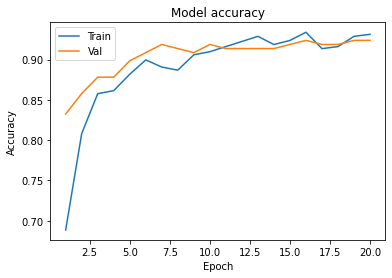

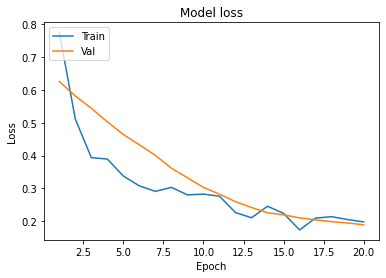

In [58]:
plot_learningCurve(history, epochs)

# Adding MaxPool

In [61]:
epochs = 50
model = Sequential()
# First Layer
model.add(Conv1D(32, 2, activation="relu", input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.2))

# Second Layer
model.add(Conv1D(64, 2, activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))

# Third Layer
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.5))

# Output Layer 
model.add(Dense(1, activation="sigmoid"))

Epoch 1/50
25/25 [==============================] - 0s 11ms/step - loss: 1.2011 - accuracy: 0.5197 - val_loss: 0.6798 - val_accuracy: 0.5482
Epoch 2/50
25/25 [==============================] - 0s 6ms/step - loss: 0.8935 - accuracy: 0.6074 - val_loss: 0.6448 - val_accuracy: 0.6802
Epoch 3/50
25/25 [==============================] - 0s 7ms/step - loss: 0.8133 - accuracy: 0.6544 - val_loss: 0.6174 - val_accuracy: 0.6599
Epoch 4/50
25/25 [==============================] - 0s 8ms/step - loss: 0.7302 - accuracy: 0.7065 - val_loss: 0.5925 - val_accuracy: 0.6497
Epoch 5/50
25/25 [==============================] - 0s 7ms/step - loss: 0.6752 - accuracy: 0.7344 - val_loss: 0.5709 - val_accuracy: 0.6548
Epoch 6/50
25/25 [==============================] - 0s 6ms/step - loss: 0.5296 - accuracy: 0.7738 - val_loss: 0.5485 - val_accuracy: 0.6650
Epoch 7/50
25/25 [==============================] - 0s 7ms/step - loss: 0.5208 - accuracy: 0.7967 - val_loss: 0.5257 - val_accuracy: 0.6904
Epoch 8/50
25/25 [=

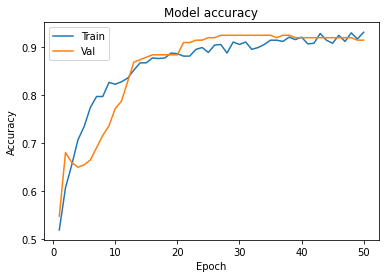

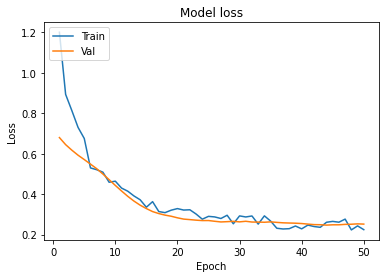

In [62]:
model.compile(optimizer=Adam(lr=0.0001), loss = "binary_crossentropy", metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)
plot_learningCurve(history, epochs)